In [82]:
import numpy as np
import pandas as pd


data = pd.read_csv("insurance.csv")


data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [85]:
import plotly.express as px
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

the following settings will improve the default style and font sizes of our charts


In [86]:
sns.set_style("darkgrid")
mp.rcParams["font.size"] = 14
mp.rcParams["figure.figsize"] = (10, 6)
mp.rcParams["figure.facecolor"] = "#00000000"

In [87]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [88]:
# Create the histogram with a box plot overlay
fig = px.histogram(data, x="age", marginal="box", nbins=47, title="Distribution of age")

# Update layout settings
fig.update_layout(bargap=0.1)

# Display the figure in VSCode using pyo.iplot()
fig

no. of customers is twice in the case of age 18-19


In [89]:
fig1 = px.histogram(
    data,
    x="bmi",
    marginal="box",
    color_discrete_sequence=["deepskyblue"],
    title="Distribution of BMI",
)


fig1.update_layout(bargap=0.1)


fig1

In [90]:
fig2 = px.histogram(
    data,
    x="charges",
    marginal="box",
    color="smoker",
    color_discrete_sequence=["red", "lime"],
)


fig2.update_layout(bargap=0.1)


fig2

In [91]:
data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [92]:
fig3 = px.histogram(data, x="smoker", color="sex", title="Smoker")
fig3

In [93]:
fig4 = px.scatter(
    data,
    x="age",
    y="charges",
    color="smoker",
    color_discrete_sequence=("red", "lime"),
    opacity=0.8,
    hover_data=["sex"],
    title="Age vs. Charges",
)
fig4.update_traces(marker_size=5)
fig4

Most 'healthy' non-smokers incur less expenses. But some maybe due to age, chronic illness, accidents, etc. incur higher charges.

Smokers incur more charges than non-smokers.

Middle cluster suggests that there can be two more categories - 'smokers with no illness' and 'non-smokers with illness'.

The top cluster shows smokers who possibly have some major medical issue.


In [94]:
# Relationship between BMI and Charges
fig5 = px.scatter(
    data,
    x="bmi",
    y="charges",
    color="smoker",
    color_discrete_sequence=("red", "purple"),
    opacity=0.8,
    hover_data=("sex"),
    title="BMI vs. Charges",
)
fig5.update_traces(marker_size=5)
fig5

Smoking with BMI>30 shows higher charges.

Non-smokers with BMI>30 mostly incur less charge as compared to smokers with higher BMI.


In [95]:
px.scatter(data, x="children", y="charges")

In [96]:
px.violin(data, x="children", y="charges")

In [97]:
# correlation coeff
a = data.charges.corr(data.age)
b = data.charges.corr(data.bmi)
c = data.charges.corr(data.children)
print(
    "",
    "charges and age corr: ",
    a,
    "\n",
    "charges and bmi corr: ",
    b,
    "\n",
    "charges and children corr: ",
    c,
)
# convert smoker column values to numeric data
smoker_values = {"no": 0, "yes": 1}
smoker_numeric = data.smoker.map(smoker_values)
d = data.charges.corr(smoker_numeric)
print("", "charges and smoker corr: ", d)

 charges and age corr:  0.2990081933306478 
 charges and bmi corr:  0.19834096883362887 
 charges and children corr:  0.06799822684790487
 charges and smoker corr:  0.7872514304984778


In [98]:
data.corr(numeric_only=True)
# as corr() only works with numeric data, numeric_only=True is necessary in vscode

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

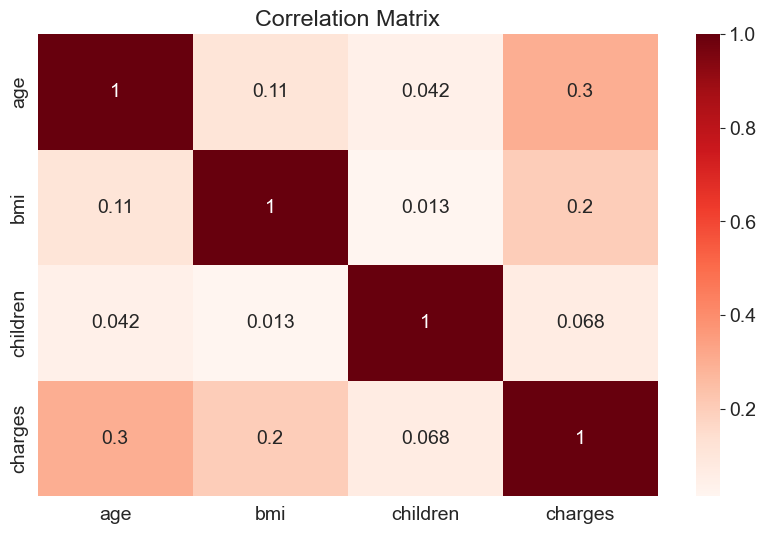

In [99]:
sns.heatmap(data.corr(numeric_only=True), cmap="Reds", annot=True)
plt.title("Correlation Matrix")

In [100]:
def est_charges(age, w, b):
    return w * age + b

In [101]:
est_charges(40, 20, 30)

830

In [102]:
smoker_data = data[data["smoker"] == "yes"]
non_smoker_data = data[data["smoker"] == "no"]

In [103]:
ages = non_smoker_data.age
w = 50
b = 100
non_smoker_charges = est_charges(ages, w, b)
non_smoker_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Text(0, 0.5, 'Estimated Non-Smoker Charges')

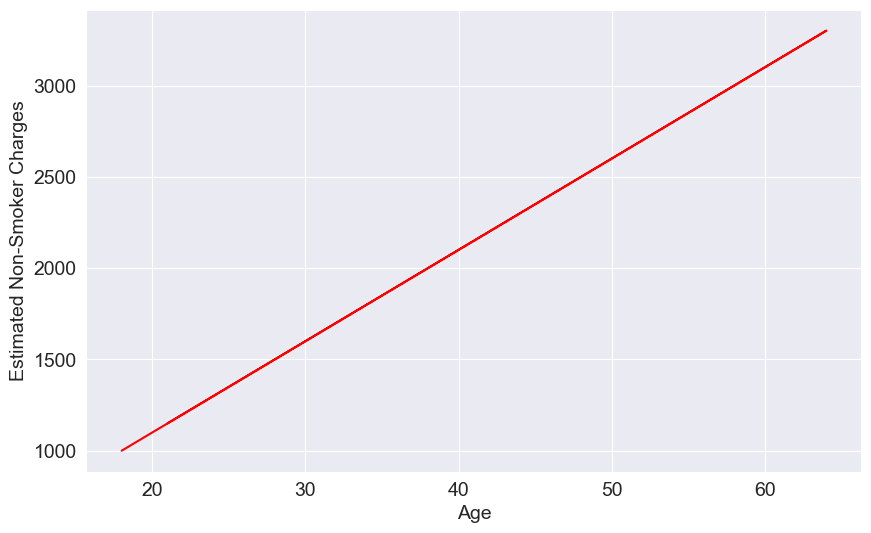

In [104]:
plt.plot(ages, non_smoker_charges, "r")
plt.xlabel("Age")
plt.ylabel("Estimated Non-Smoker Charges")

In [105]:
def try_parameters(w, b):
    ages = non_smoker_data.age
    target = non_smoker_data.charges

    charges = est_charges(ages, w, b)

    plt.plot(ages, charges, "r", alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate", "Actual"])

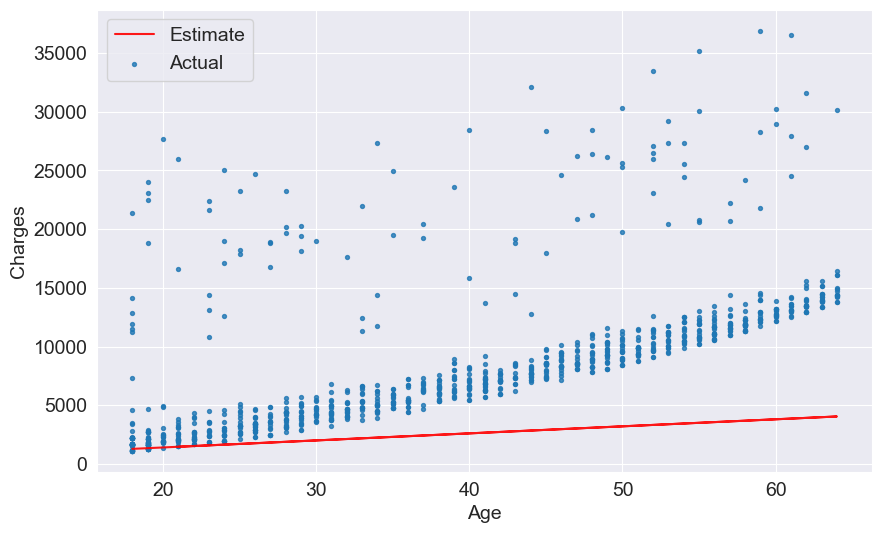

In [106]:
try_parameters(60, 200)

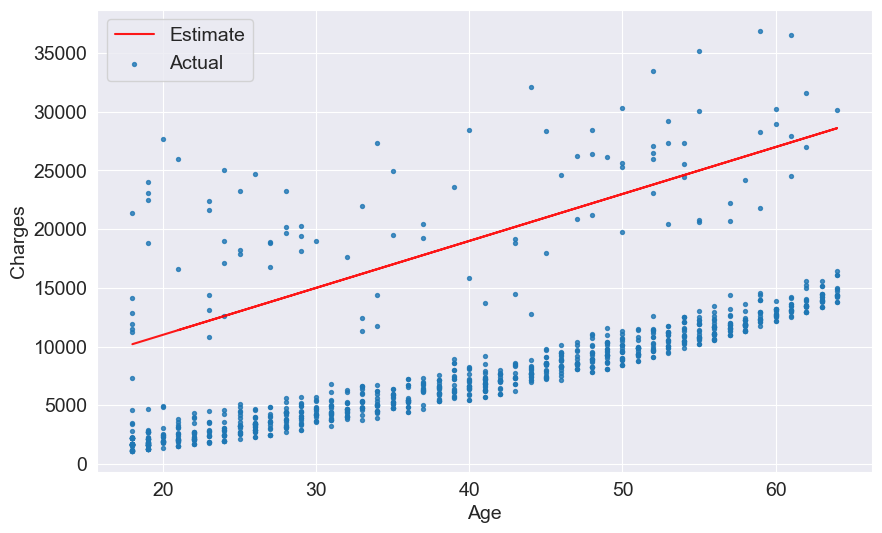

In [107]:
try_parameters(400, 3000)

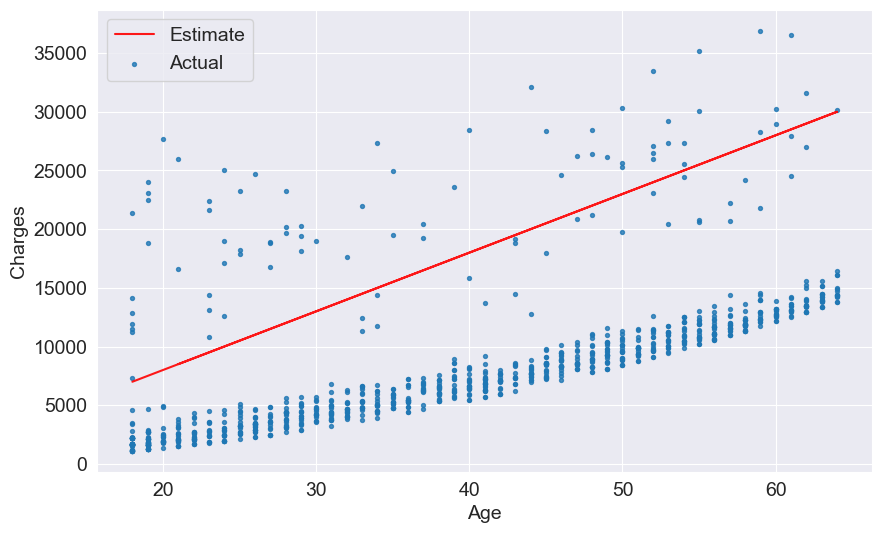

In [108]:
try_parameters(500, -2000)

In [109]:
import sklearn as sk
from sklearn.linear_model import LinearRegression

model = LinearRegression()
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [110]:
inputs = non_smoker_data[["age"]]
# inputs must be 2D array for fitting, targets can be 1D array.
targets = non_smoker_data["charges"]
feature_names = ["Non-smoker Charges"]
model.fit(inputs, targets)
# it improves W, b values till it finds the best ones

LinearRegression()

In [111]:
model.predict([[23], [37], [61]])

c:\Users\desktop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [112]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [113]:
# check predictions with actual values
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [114]:
# calculating RootMeanSquared Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(targets, predictions)
rmse = np.sqrt(mse)
rmse

4662.505766636395

In [115]:
# value of W
model.coef_

array([267.24891283])

In [116]:
# value of b
model.intercept_

-2091.4205565650864

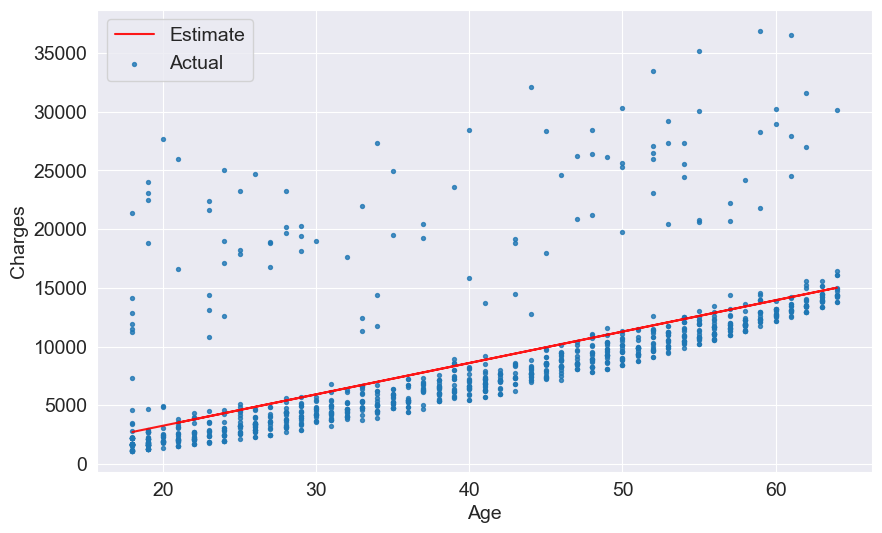

In [117]:
try_parameters(267.24891283, -2091.4205565650864)

In [118]:
from sklearn.linear_model import SGDRegressor

model_1 = SGDRegressor()
model_1.fit(inputs, targets)
print(model.coef_)
print(model.intercept_)

[267.24891283]
-2091.4205565650864


In [119]:
predictions_sgd = model.predict(inputs)
predictions_sgd

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [120]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [121]:
mse_sgd = mean_squared_error(targets, predictions_sgd)
rmse_sgd = np.sqrt(mse_sgd)
rmse_sgd

4662.505766636395

In [122]:
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming non_smoker_data is your DataFrame
inputs = non_smoker_data[["age"]]
targets = non_smoker_data["charges"]

# Standardize the features (important for SGDRegressor)
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    inputs_scaled, targets, test_size=0.3, random_state=50
)

# Set random seed for SGDRegressor
sgd_model = SGDRegressor(random_state=45)
sgd_model.fit(X_train, y_train)

# Set random seed for LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
predictions_sgd = sgd_model.predict(X_test)
predictions_linear = linear_model.predict(X_test)

# Compare the predictions
print("SGDRegressor Predictions:", predictions_sgd)
print("LinearRegression Predictions:", predictions_linear)

# Compare RMSE for evaluation
rmse_sgd = np.sqrt(mean_squared_error(y_test, predictions_sgd))
rmse_linear = np.sqrt(mean_squared_error(y_test, predictions_linear))

print("RMSE for SGDRegressor:", rmse_sgd)
print("RMSE for LinearRegression:", rmse_linear)

SGDRegressor Predictions: [ 3233.07400903  5057.15482865  9226.48241633  3233.07400903
  9487.06539056  4796.57185442 10008.23133902  9747.64836479
  2972.4910348   5317.73780288  3233.07400903  5838.90375134
 13916.97595248 14438.14190094 10008.23133902  5057.15482865
 14438.14190094  2972.4910348  12353.4781071   3493.65698326
  4796.57185442 10529.39728748  4014.82293172  8705.31646787
  4014.82293172  7402.40159672 11311.14621018  8444.73349364
  8965.8994421   3233.07400903  3493.65698326 12092.89513287
 11050.56323595 11311.14621018  2972.4910348   4796.57185442
 12353.4781071  12874.64405556 11050.56323595 14698.72487517
 11311.14621018 13916.97595248 13395.81000402  6881.23564826
 13135.22702979 12092.89513287  6620.65267403  6360.0696998
 14438.14190094  7662.98457095  3233.07400903 11571.72918441
 13916.97595248  3493.65698326  5578.32077711  2972.4910348
  8184.15051941  4275.40590595 14438.14190094 10529.39728748
 13135.22702979 11050.56323595  5838.90375134  5057.15482865


In [123]:
print("Coefficient: ", sgd_model.coef_)
print("Intercept: ", sgd_model.intercept_)

Coefficient:  [3668.1718885]
Intercept:  [8545.14610589]


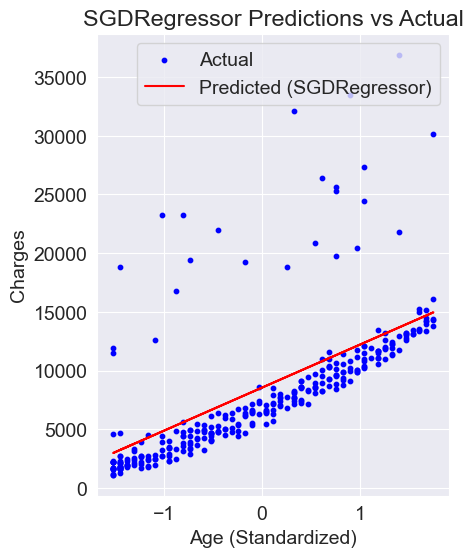

In [124]:
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, s=10, color="blue", label="Actual")
plt.plot(X_test, predictions_sgd, color="red", label="Predicted (SGDRegressor)")
plt.title("SGDRegressor Predictions vs Actual")
plt.xlabel("Age (Standardized)")
plt.ylabel("Charges")
plt.legend()

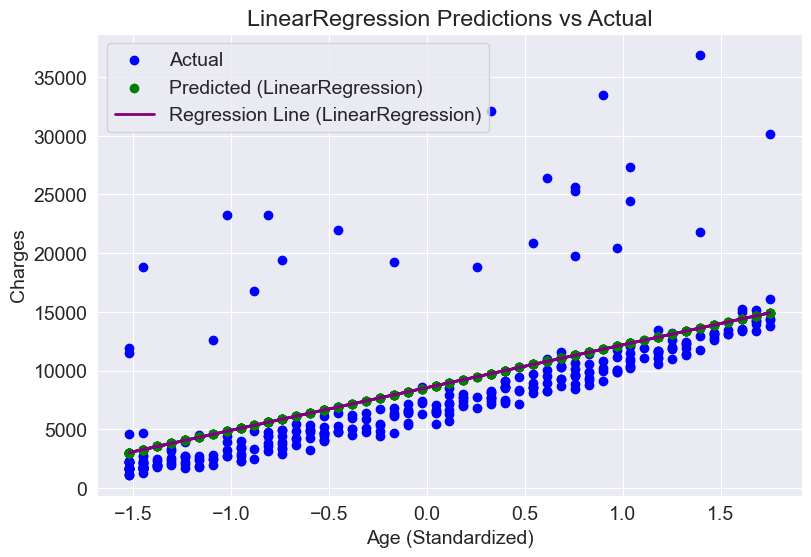

In [125]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(
    X_test, predictions_linear, color="green", label="Predicted (LinearRegression)"
)
plt.plot(
    X_test,
    linear_model.coef_ * X_test + linear_model.intercept_,
    color="purple",
    linewidth=2,
    label="Regression Line (LinearRegression)",
)
plt.title("LinearRegression Predictions vs Actual")
plt.xlabel("Age (Standardized)")
plt.ylabel("Charges")
plt.legend()

[ 6620.65267403 10008.23133902  4796.57185442 11050.56323595
  3754.23995749  2972.4910348  11832.31215864  6620.65267403
  2972.4910348  10008.23133902  4275.40590595  2972.4910348
  3233.07400903  6360.0696998  11571.72918441  6360.0696998
 10789.98026172  8705.31646787 10268.81431325  7662.98457095
  7141.81862249  7923.56754518  4275.40590595 14698.72487517
  3233.07400903  9747.64836479  3233.07400903  3233.07400903
  8184.15051941 10529.39728748  8184.15051941 11571.72918441
  8705.31646787 14177.55892671  2972.4910348  12614.06108133
 13395.81000402  5578.32077711  5057.15482865  9487.06539056
 12614.06108133  8444.73349364 11050.56323595 14438.14190094
 11311.14621018 13135.22702979  9226.48241633  7662.98457095
  3233.07400903  2972.4910348   4275.40590595 10529.39728748
 13135.22702979 12092.89513287  2972.4910348  11050.56323595
 14698.72487517 12353.4781071   7923.56754518 12614.06108133
 14959.3078494  13395.81000402  4014.82293172  8184.15051941
 10789.98026172  5578.3207

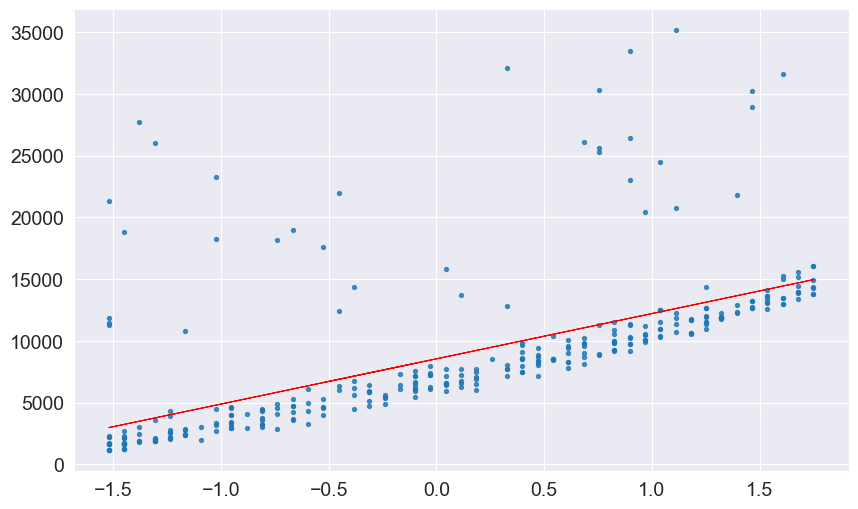

In [126]:
inputs_1 = smoker_data[["age"]]
targets_1 = smoker_data["charges"]
inputs_scaled_1 = StandardScaler().fit_transform(inputs_1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    inputs_scaled, targets, test_size=0.3, random_state=0
)
sgd_model_1 = SGDRegressor(random_state=0)
sgd_model_1.fit(X_train, y_train)
predictions_sgd_1 = sgd_model.predict(X_test)
print(predictions_sgd_1)
mse1 = mean_squared_error(y_test, predictions_sgd_1)
rmse1 = np.sqrt(mse)
print("RMS Error: ", rmse1)
print("Model coefficient: ", model_1.coef_)
print("Model intercept: ", sgd_model_1.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, s=8, alpha=0.8)
plt.plot(X_test, predictions_sgd_1, "r", alpha=1, linewidth=0.8)

In [127]:
non_smoker_data = data[data["smoker"] == "no"]
non_smoker_data.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [128]:
smoker_data = data[data["smoker"] == "yes"]
smoker_data.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


Multiple Linear Regression


In [129]:
from sklearn.linear_model import LinearRegression

inputs, targets = non_smoker_data[["age", "bmi"]], non_smoker_data["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
print("Predictions : ", predictions)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(targets, predictions)
rmse = np.sqrt(mse)
print("RMSE : ", rmse)
print(non_smoker_data.charges.corr(non_smoker_data.age))
print(non_smoker_data.charges.corr(non_smoker_data.bmi))

Predictions :  [2749.08516308 5412.40282772 6673.94368635 ... 2735.99553127 2770.87763119
 3493.32334862]
RMSE :  4662.3128354612945
0.6279467837664197
0.08403654312833271


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
inputs_scaled = sc.fit_transform(inputs)
X_train, X_test, y_train, y_test = train_test_split(
    inputs_scaled, targets, test_size=0.3, random_state=42
)
predict = model.predict(X_test)
print(predict)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predict)))
print("model coefficient: ", model.coef_)
print("model intercept: ", model.intercept_)

[-2445.60379599 -2241.46333313 -2417.75436724 -2528.80021568
 -2323.1957485  -2693.74099025 -2028.54920417 -2555.54291222
 -1919.16063842 -2452.34511086 -2384.41159892 -2601.05636022
 -2699.79704549 -1927.84667639 -2166.29652504 -2023.64133092
 -2421.77244001 -1934.36520264 -2683.68488435 -2562.60635769
 -2309.57863526 -2574.26725966 -1928.73692823 -2291.2876999
 -2484.10110522 -2674.39580929 -2658.40101222 -1865.62929266
 -2400.29511451 -2115.51184907 -2694.22734028 -1927.53603396
 -2360.22274515 -1817.00559448 -2661.78022936 -1947.62504376
 -2024.30901979 -2585.96330315 -1926.40001716 -2545.24644693
 -2353.38771956 -2445.51616786 -2152.72018457 -2238.03117803
 -2612.86954211 -1998.19909628 -2346.27178748 -2063.06943908
 -2399.16495463 -2557.26484669 -2347.38460227 -2548.16319307
 -1827.60076269 -2216.1208918  -1916.43739631 -2709.82409246
 -2501.31999856 -2686.08036461 -1984.16614172 -2644.15698287
 -2032.47334055 -2434.37630609 -2689.53009047 -2612.51226999
 -2572.99630803 -2212.764

c:\Users\desktop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



#### Reduction in Error after adding "children" column to inputs


In [131]:
inputs, target = non_smoker_data[["age", "bmi", "children"]], non_smoker_data["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
mse = mean_squared_error(targets, predictions)
rmse = np.sqrt(mse)
print("RMSE : ", rmse)
predictions

RMSE :  4608.470405038246


array([2724.94209163, 6535.13457204, 6065.27173951, ..., 2134.51524931,
       2160.54349555, 2898.08585583])

In [132]:
model.coef_, model.intercept_

(array([265.2938443 ,   5.27956313, 580.65965053]), -2809.297603223591)

In [133]:
# Using XGBoost Regressor
from xgboost import XGBRegressor
inputs, target = non_smoker_data[["age", "bmi", "children"]], non_smoker_data["charges"]

# Fitting the model
model = XGBRegressor().fit(inputs, target)

# Predictions
predictions = model.predict(inputs)

# Calculating RMSE
mse = mean_squared_error(target, predictions)
rmse = np.sqrt(mse)
print("RMSE : ", rmse)
predictions

RMSE :  1148.5601811654628


array([ 1602.7593,  4302.6206, 21165.64  , ...,  2005.0479,  1783.6776,
        1522.0334], dtype=float32)

In [134]:
# For smoker_data
import numpy as np
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

inputs, target = smoker_data[["age", "bmi", "children"]], smoker_data["charges"]

# Fitting the model
model = XGBRegressor()
model.fit(inputs, target)

# Predictions
predictions = model.predict(inputs)

# Calculating RMSE
mse = mean_squared_error(target, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
predictions

RMSE: 55.34872616855116


array([16879.143, 27844.916, 39613.977, 36751.637, 37684.793, 38750.055,
       35550.074, 51136.37 , 39768.72 , 48179.418, 38800.266, 23569.701,
       37707.   , 47504.242, 34312.203, 23246.658, 14748.645, 17673.31 ,
       16551.703, 37169.586, 39809.812, 21315.81 , 43610.19 , 30197.121,
       47271.816, 22419.936, 15822.596, 30941.707, 17622.87 , 47045.977,
       19034.717, 39578.37 , 17054.252, 32698.787, 18964.166, 20736.88 ,
       40720.914, 19992.477, 21295.049, 15528.862, 37148.453, 21373.07 ,
       36205.945, 48816.96 , 43738.37 , 37141.266, 21028.488, 34828.562,
       19571.328, 19442.21 , 17419.46 , 38471.66 , 29543.361, 12847.952,
       47298.387, 44274.594, 41001.586, 43906.285, 33778.516, 17054.438,
       24883.28 , 36215.445, 46154.016, 17209.426, 42853.73 , 22282.848,
       48555.586, 47886.57 , 42121.207, 16296.951, 21991.38 , 38792.242,
       24851.57 , 42097.13 , 34708.547, 35633.02 , 42753.406, 47918.043,
       48557.57 , 24404.217, 41932.69 , 13895.629, 